# Video Game Sales Analysis 

## This project is will be working with the games.csv data set which contains information about many games including their name, platforms they are on, when they were released, reviews information and sales information. With this data, the goal is to determine what games to be targeted to advertise with the highest chance they will succeed. This project will be broken down into the following steps: 
###  Study general information and prepare data i.e. fixing data types and removing/filling missing values
###  Analyze the data
###  Prepare a user profile for each region
###  Test Hypotheses
### General Conclusion

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

### Study general information and prepare data i.e. fixing data types and removing/filling missing values

In [2]:
# Read in data
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Fix column headings
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# General information of data set
data.info()
data.isnull().sum()/len(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

The missing data in critic_score, user_score, rating are account for at least 40%-50% of all rows.

In [5]:
# Filling missing values in rating column and removing missing values in the name, year_of_release and genre column
data['rating'].fillna('Unknown', inplace=True)
data.dropna(subset = ['name', 'genre', 'year_of_release'], inplace=True)
data.info()
data.isnull().sum()/len(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.000000
dtype: float64

Missing names in the data set could be due to user error when inputing the games into a table or old games do not have complete information. Missing genres could be due to the genre being ambiguous or the genre was deemed unimportant to add. Missing ratings could be due to the game not being in the ESRB catalog for rating. Here I replaced the missing values with "Unknown" for the rating column and removed the few rows in name, genre and year_of_release columns with missing values. 

In [6]:
# Display info of dataframe after fixing year_of_release datatype
data['year_of_release'] = data['year_of_release'].astype(int) #casting the float mean years as int (ex. 1998.7382 will become 1998)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Missing years could be due to incomplete data entries for certain games. I decided the best way to handle missing years is to drop the rows since it makes up a small portion of the dataframe.

In [7]:
# Replacing 'tbd' values to NaN to replace at a later step
data['user_score'].replace('tbd', np.nan, inplace=True)

Here I am treating 'tbd' as essentially a missing value so at a later step I can decide what action to take.

In [8]:
# Fixing data type for user_score column
data['user_score'] = pd.to_numeric(data['user_score'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


After removing 'tbd' from the column, the column can now be changed to a float64 data types since all user scores should be decimal numbers

For user_score and critic_score, there is not necessarily a perfect way to deal with these scores, so I have decided to leave the missing values as is. Missing critic values could be due to several reasons such as some games do not have ratings for certain platforms or regions, less popular games never were popular enough to get a score, or user generated data has been hidden for privacy reasons. Missing user scores could be due to the same reasons as critic score.

In [9]:
# All rows contain the appropriate data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
# Summing sales from all regions and appending those values to the data frame in a new column called 'total_sales'
data.loc[:, 'total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [11]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


### Analyze the Data

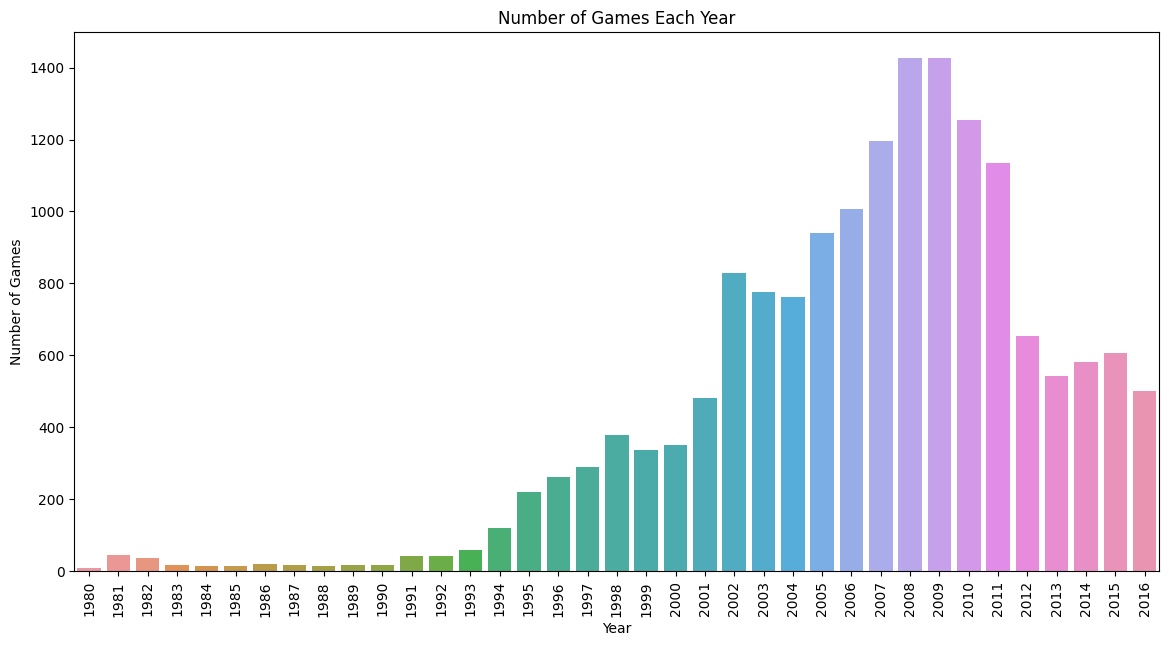

In [12]:
# Analyzing how many games were released in different years
games_each_year = data.groupby(['year_of_release'])['name'].count()

# Plot the number of games released each year
plt.figure(figsize=(14, 7))
sns.barplot(x=games_each_year.index, y=games_each_year.values)
plt.title('Number of Games Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

Each year from 1980 to 1993 have less than 100 games per year while 1994 onwards has at least 121 games released per year with a max number of games in 2008 with 1524 games. So they data from 1980-1993 is less significant in terms of the number of games released per year.

In [13]:
# Determining platforms with with the greatest total sales
platform_sales = data.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False)
platform_sales.head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

The top 10 best selling platforms are the PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP and 3DS.

In [14]:
# Getting the top ten platforms
top_10_plat = platform_sales.head(10)

# Creates table with sales information for every platform for every year found in the dataset
sales_by_year = data[data['platform'].isin(top_10_plat.index)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Gets latest year (2016)
latest_year = data['year_of_release'].max()

# Finds platforms that use to be popular but are now obsolete (no recent sales)
obsolete_platforms = sales_by_year.columns[sales_by_year.iloc[-1] == 0]

# Determining the average lifespan for all platforms
platform_lifespan = data.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']

average_lifespan = platform_lifespan['lifespan'].mean()

# Displaying the data
print("Top 10 platforms:", top_10_plat)
print()
print("Sales_by_year:")
print(sales_by_year)
print("Obsolete platforms:", obsolete_platforms)
print()
print("Average platform lifespan in years:", average_lifespan)

Top 10 platforms: platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

Sales_by_year:
platform           3DS      DS    GBA      PS     PS2     PS3     PS4    PSP  \
year_of_release                                                                
1985              0.00    0.02   0.00    0.00    0.00    0.00    0.00   0.00   
1994              0.00    0.00   0.00    6.03    0.00    0.00    0.00   0.00   
1995              0.00    0.00   0.00   35.96    0.00    0.00    0.00   0.00   
1996              0.00    0.00   0.00   94.70    0.00    0.00    0.00   0.00   
1997              0.00    0.00   0.00  136.17    0.00    0.00    0.00   0.00   
1998              0.00    0.00   0.00  169.49    0.00    0.00    0.00   0.00   
1999              0.00    0.00   0.00  144.53    0.00    0.00    0.00   0.00   
2000              0.00    0.00   0.07   96.

The platforms DS, GBA, PS, PS2 and PSP do not have sales for the most recent year. They were all popular for about 8 years during their prime. In fact, the average lifespan of these top 10 platforms is 7.612903225806452 years.

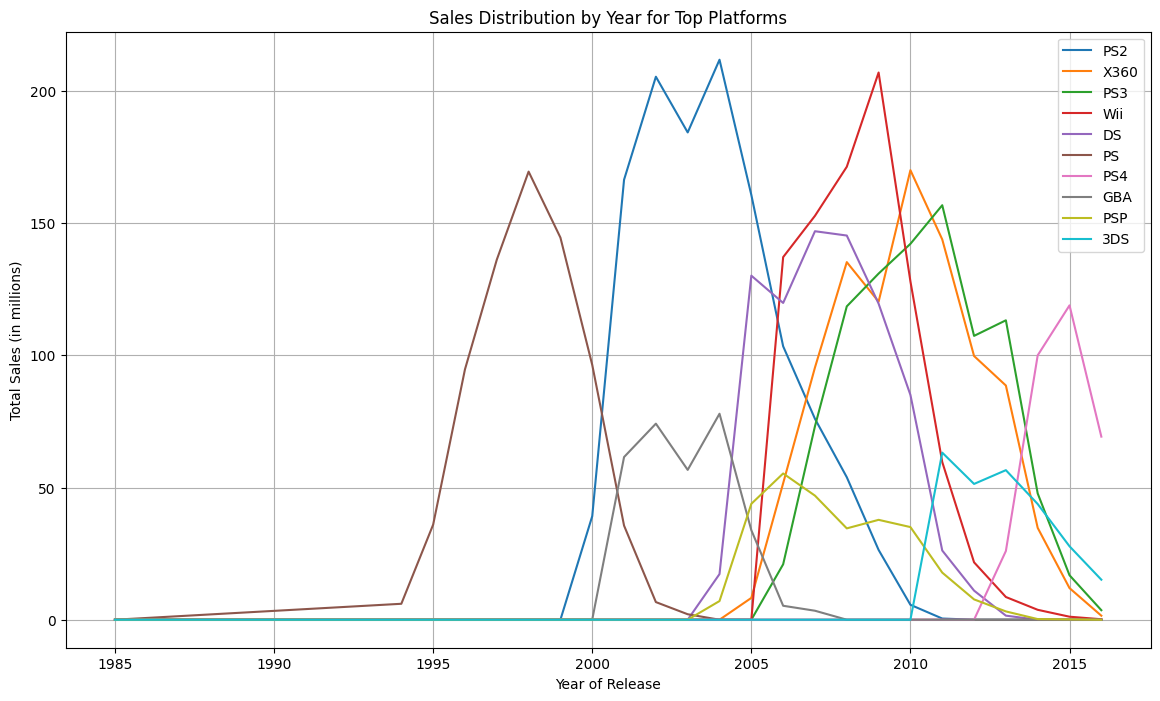

In [15]:
# Plot sales distribution by year for top platforms
plt.figure(figsize=(14, 8))
for platform in top_10_plat.index:
    plt.plot(sales_by_year.index, sales_by_year[platform], label=platform)

plt.title('Sales Distribution by Year for Top Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend()
plt.grid(True)
plt.show()

Each console has a distinct rise, peak, and fall in popularity. Some consoles are popular for about 6-7 years such as the GBA and others like the PS2 can be popular for up to 10 years.

Based on the data from previous steps, I have determined to only take data from 2014 and onwards to accurately predict trends for the upcoming 2017 year.

In [16]:
# New data will contain information for games released after 2013
new_data = data[data['year_of_release'] > 2013]
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


In [17]:
# Determining leading platforms in the most recent year
latest_sales_by_platform = new_data[new_data['year_of_release'] == new_data['year_of_release'].max()].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Platforms leading by sales:", latest_sales_by_platform)

Platforms leading by sales: platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64


In [18]:
# Creating updated table of all platforms and their profits per year
sales_by_year = new_data[new_data['platform'].isin(platform_sales.index)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Allows the entire table to be displayed
pd.set_option('display.max_columns', None)
sales_by_year

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


Based on the above table, I have determined that the PS3, PSP, PSV, Wii, and X360 are shrinking platforms nearing the end or at the end of their lifespan. Some platforms have a slower decline than others such as PSV is steadily decling compared to the PS3 which declines rapidly in the last 3 years.
The PS4 and XOne are the platforms that show a clear growing in popularity and are currently the top two in sales for the most recent year.

I will select the platforms PS4, XOne, 3DS, and PC as potentially profitable platforms. 

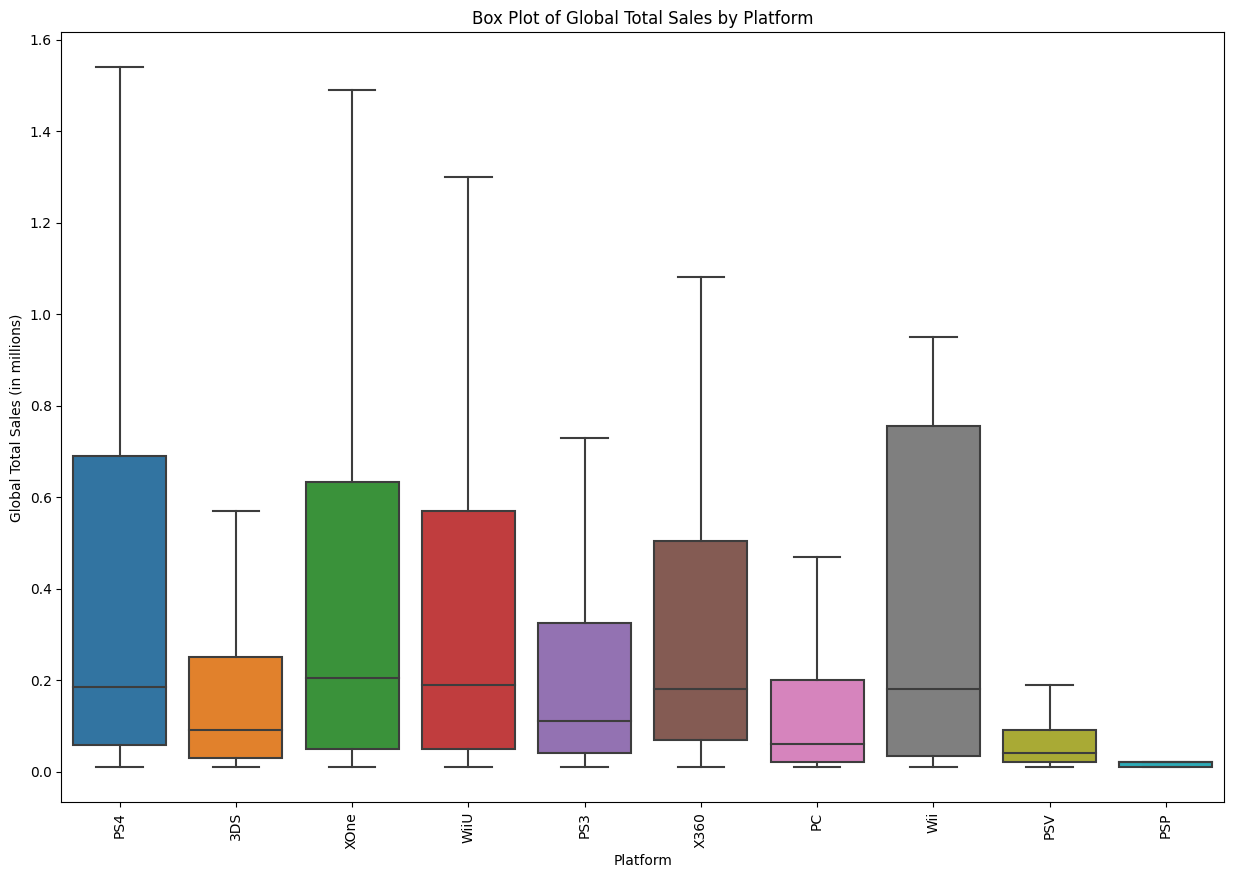

In [19]:
# Creating boxplot to visualize the global sales of all games by platform
plt.figure(figsize=(15, 10))
sns.boxplot(data=new_data, x='platform', y='total_sales',showfliers=False)
plt.xticks(rotation=90)
plt.title('Box Plot of Global Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Total Sales (in millions)')
plt.show()

Most platforms have outliers that are beyond the upper boundary sugggesting there is significant variabilty across the platforms. The PS4 and XOne have significant outliers with very high sales compared to the other platforms. Most platforms also have a broad range of sales such as the Wii and X360. The median average sales vary over platforms such as the XOne and WiiU have higher median sales than others. Some platforms such as the PSP and PSV have fewer outliers and a lower distribution compared to more popular platforms.

In [20]:
# Average sales on all platforms
avg_sales = new_data.groupby(['platform'])['total_sales'].mean().sort_values(ascending=False)
avg_sales

platform
PS4     0.766356
XOne    0.615614
WiiU    0.588767
Wii     0.460909
X360    0.434414
3DS     0.408868
PS3     0.311324
PC      0.179139
PSV     0.075932
PSP     0.027692
Name: total_sales, dtype: float64

The PS4 and XOne have the highest mean sales across all platforms. The PS4 and XOne are newer consoles with the highest mean sales and the WiiU is an older platform but is still in the top 3. Platforms that are less popular like PSP and PSV have the lowest mean sales.

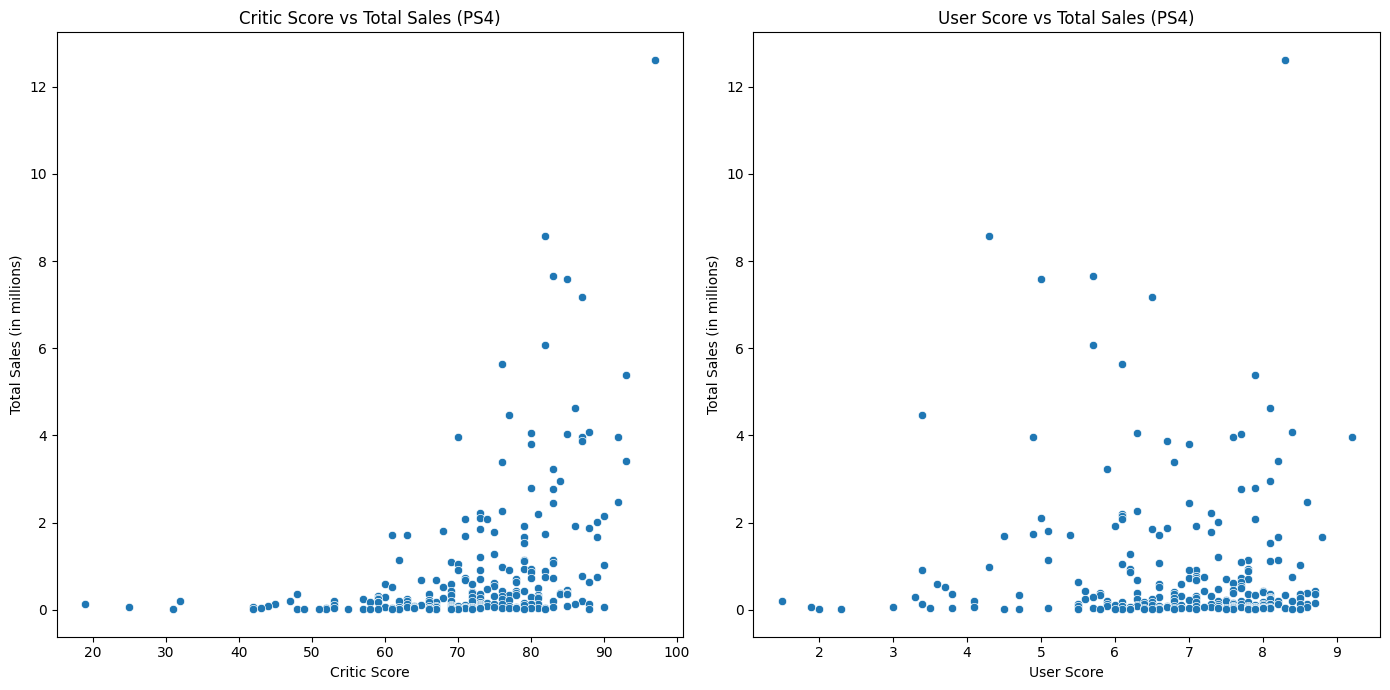

(0.40266141068104144, -0.04013158947269716)

In [21]:
# Determining correlation between reviews and sales for the PS4
ps4_games = new_data[new_data['platform'] == 'PS4']

# Scatter plot of critic_score vs total_sales
plt.figure(figsize=(14, 7))

# critic_score vs total_sales
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales')
plt.title('Critic Score vs Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

# user_score vs total_sales
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4_games, x='user_score', y='total_sales')
plt.title('User Score vs Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

# Calculate correlations
critic_corr = ps4_games[['critic_score', 'total_sales']].corr().iloc[0, 1]
user_corr = ps4_games[['user_score', 'total_sales']].corr().iloc[0, 1]

critic_corr, user_corr

Based on the scatterplot and correlation coefficients, Critic Score has a slight positive correlation with sales and User Score has a negligible correlation with sales. In determining what effects sales more, I would have to say the Critic Score is more appropriate.

In [22]:
# Comparing the sales of games on PS2 and other platforms

# Getting games that are multi-platform and on PS2
multi_plat_games = new_data[new_data['name'].isin(ps4_games['name'])]

# Getting neccessary columns for analysis
multi_plat_sales = multi_plat_games[['name', 'platform', 'total_sales']]

multi_plat_sales_agg = multi_plat_sales.groupby(['name', 'platform']).sum().reset_index()

multi_plat_sales_filtered = multi_plat_sales_agg[multi_plat_sales_agg['name'].isin(multi_plat_sales_agg['name'].value_counts()[multi_plat_sales_agg['name'].value_counts() > 1].index)]

# Grouping games and platforms and summing the total sales
game_sales_per_plat = multi_plat_sales_filtered.groupby(['name', 'platform'])['total_sales'].sum()

# Getting the first 50 rows
print(game_sales_per_plat.head(50))

# Getting the last 50 rows
game_sales_per_plat.tail(50)


name                                                    platform
7 Days to Die                                           PS4         0.14
                                                        XOne        0.05
Adventure Time: Finn & Jake Investigations              3DS         0.09
                                                        PS3         0.08
                                                        PS4         0.10
                                                        WiiU        0.05
                                                        X360        0.09
                                                        XOne        0.05
Aegis of Earth: Protonovus Assault                      PS3         0.02
                                                        PS4         0.02
                                                        PSV         0.03
Agatha Christie's The ABC Murders                       PS4         0.02
                                                        XOn

name                            platform
WWE 2K16                        PS4         1.21
                                X360        0.43
                                XOne        0.59
WWE 2K17                        PS3         0.14
                                PS4         0.60
                                X360        0.10
                                XOne        0.26
Warriors Orochi 3               PS4         0.15
                                XOne        0.04
Wasteland 2                     PC          0.10
                                PS4         0.12
                                XOne        0.06
Watch Dogs                      PC          0.44
                                PS3         1.74
                                PS4         4.05
                                WiiU        0.13
                                X360        1.25
                                XOne        1.57
Watch Dogs 2                    PS4         1.13
                            

When comparing the sales of games released on PS4 and other platforms, the sales for PS4 tend to be higher compared to other platforms. The instances when there is a significant difference in sales tends to be for popular games that are well known in the gaming community such as Assassin's Creed and Watch Dogs.

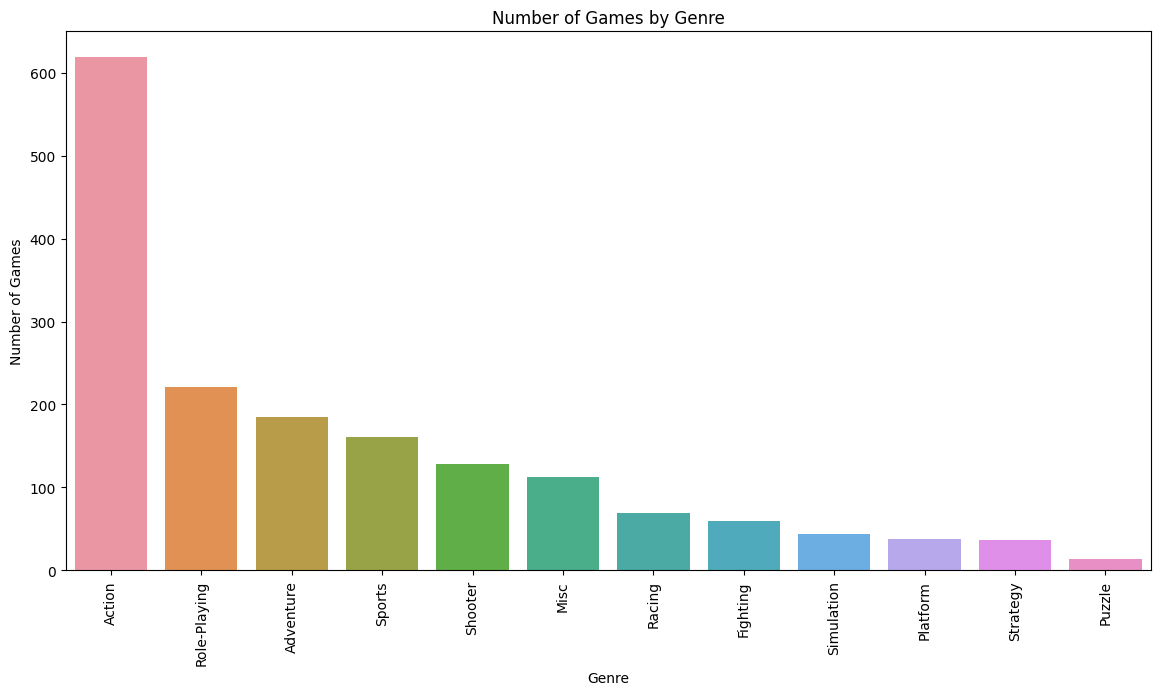

In [23]:
# Creating visual of the distribution of games by genre

genres = new_data['genre'].value_counts()

# Plot the number of games by genre
plt.figure(figsize=(14, 7))
sns.barplot(x=genres.index, y=genres.values)
plt.title('Number of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()



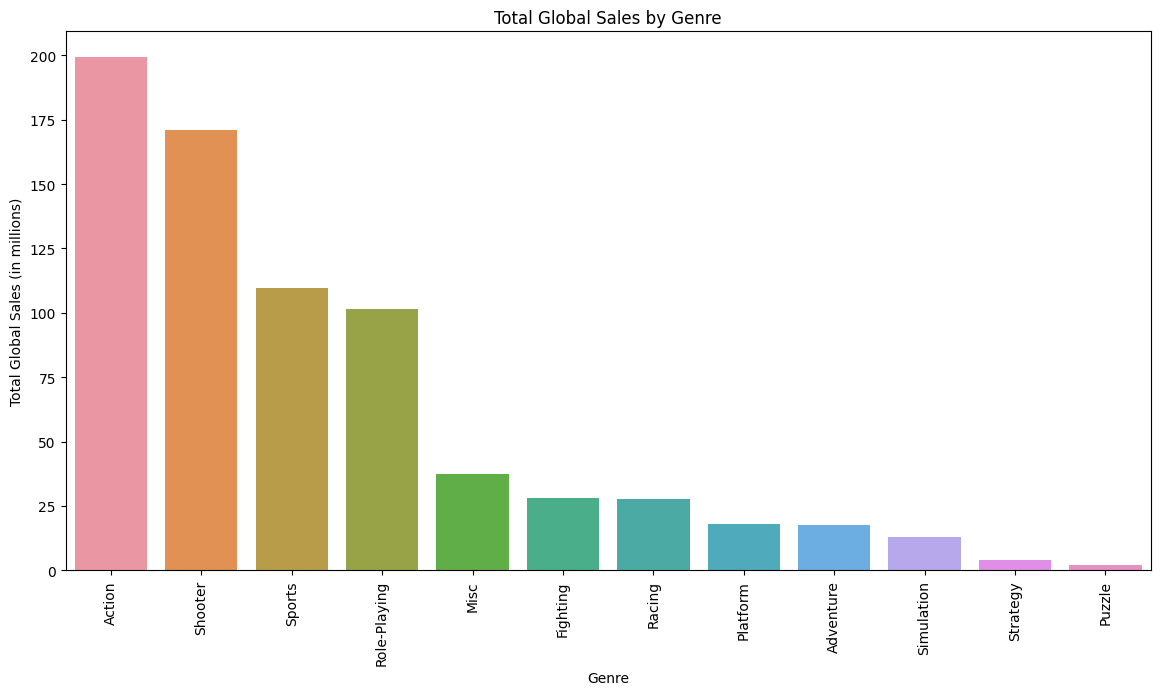

In [24]:
# Plot total global sales by genre
genre_sales = new_data.groupby('genre')['total_sales'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=genre_sales.index, y=genre_sales['sum'])
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=90)
plt.show()


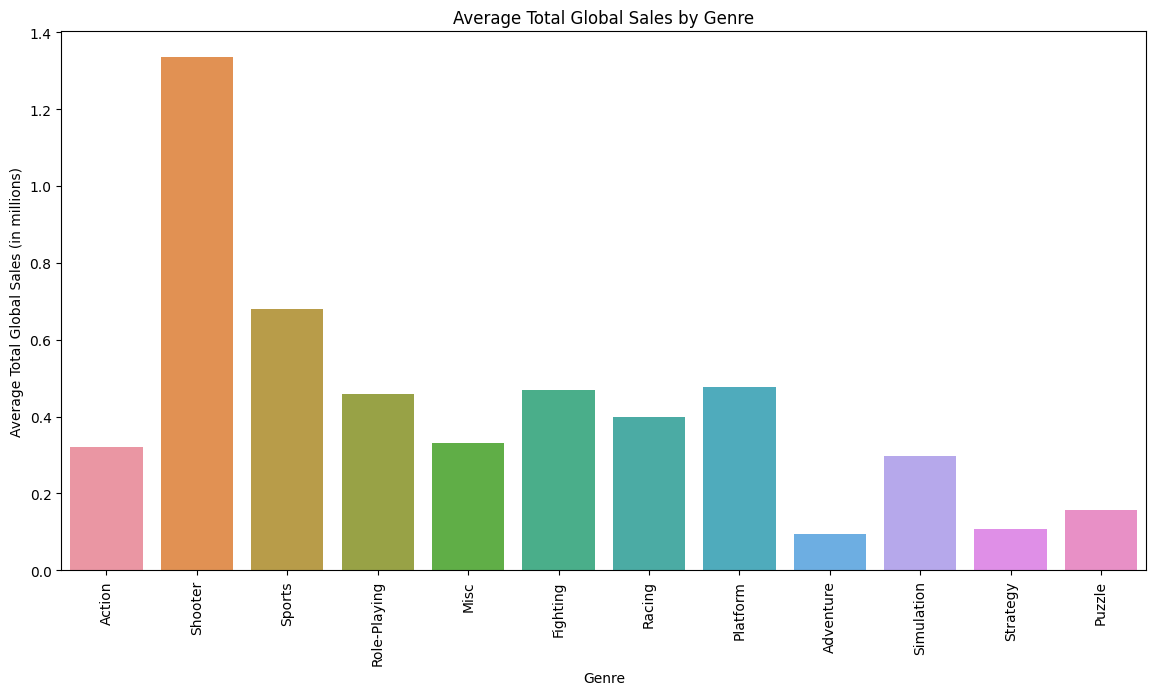

,sum,mean
genre,,
Action,199.36,0.322068
Shooter,170.94,1.335469
Sports,109.48,0.680000
Role-Playing,101.44,0.459005
Misc,37.55,0.332301
Fighting,28.22,0.470333
Racing,27.52,0.398841
Platform,18.09,0.476053
Adventure,17.55,0.094865


In [25]:
# Plot average total global sales by genre
plt.figure(figsize=(14, 7))
sns.barplot(x=genre_sales.index, y=genre_sales['mean'])
plt.title('Average Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Total Global Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

# Display the data
genre_sales

The genres with the highest total sales make more money and genres with the most number of games also can bring in a signigicant amount of revenue. From the graphs and table, Action games account for the most protitable and numerous genre, making the advertisement of these games a higher priority than other genres. For the average total sales by genre, Shooters and Sports games have the highest average total sales, meaning there are less games in these genres but certain games sell very well. Genres that have low total and average sales generally bring in less money. Overall, genres with a high number of games and a high total revenue are the most profitable and the opposite is true as well, genres with a low number of games and a low total revenue are less profitable.

###  Prepare a user profile for each region

In [26]:
# Determining the top 5 platforms in North America, Europe and Japan
top_5_plat_na = new_data.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False).head(5)
top_5_plat_eu = new_data.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False).head(5)
top_5_plat_jp = new_data.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False).head(5)
print(top_5_plat_na)
print(top_5_plat_eu)
print(top_5_plat_jp)

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


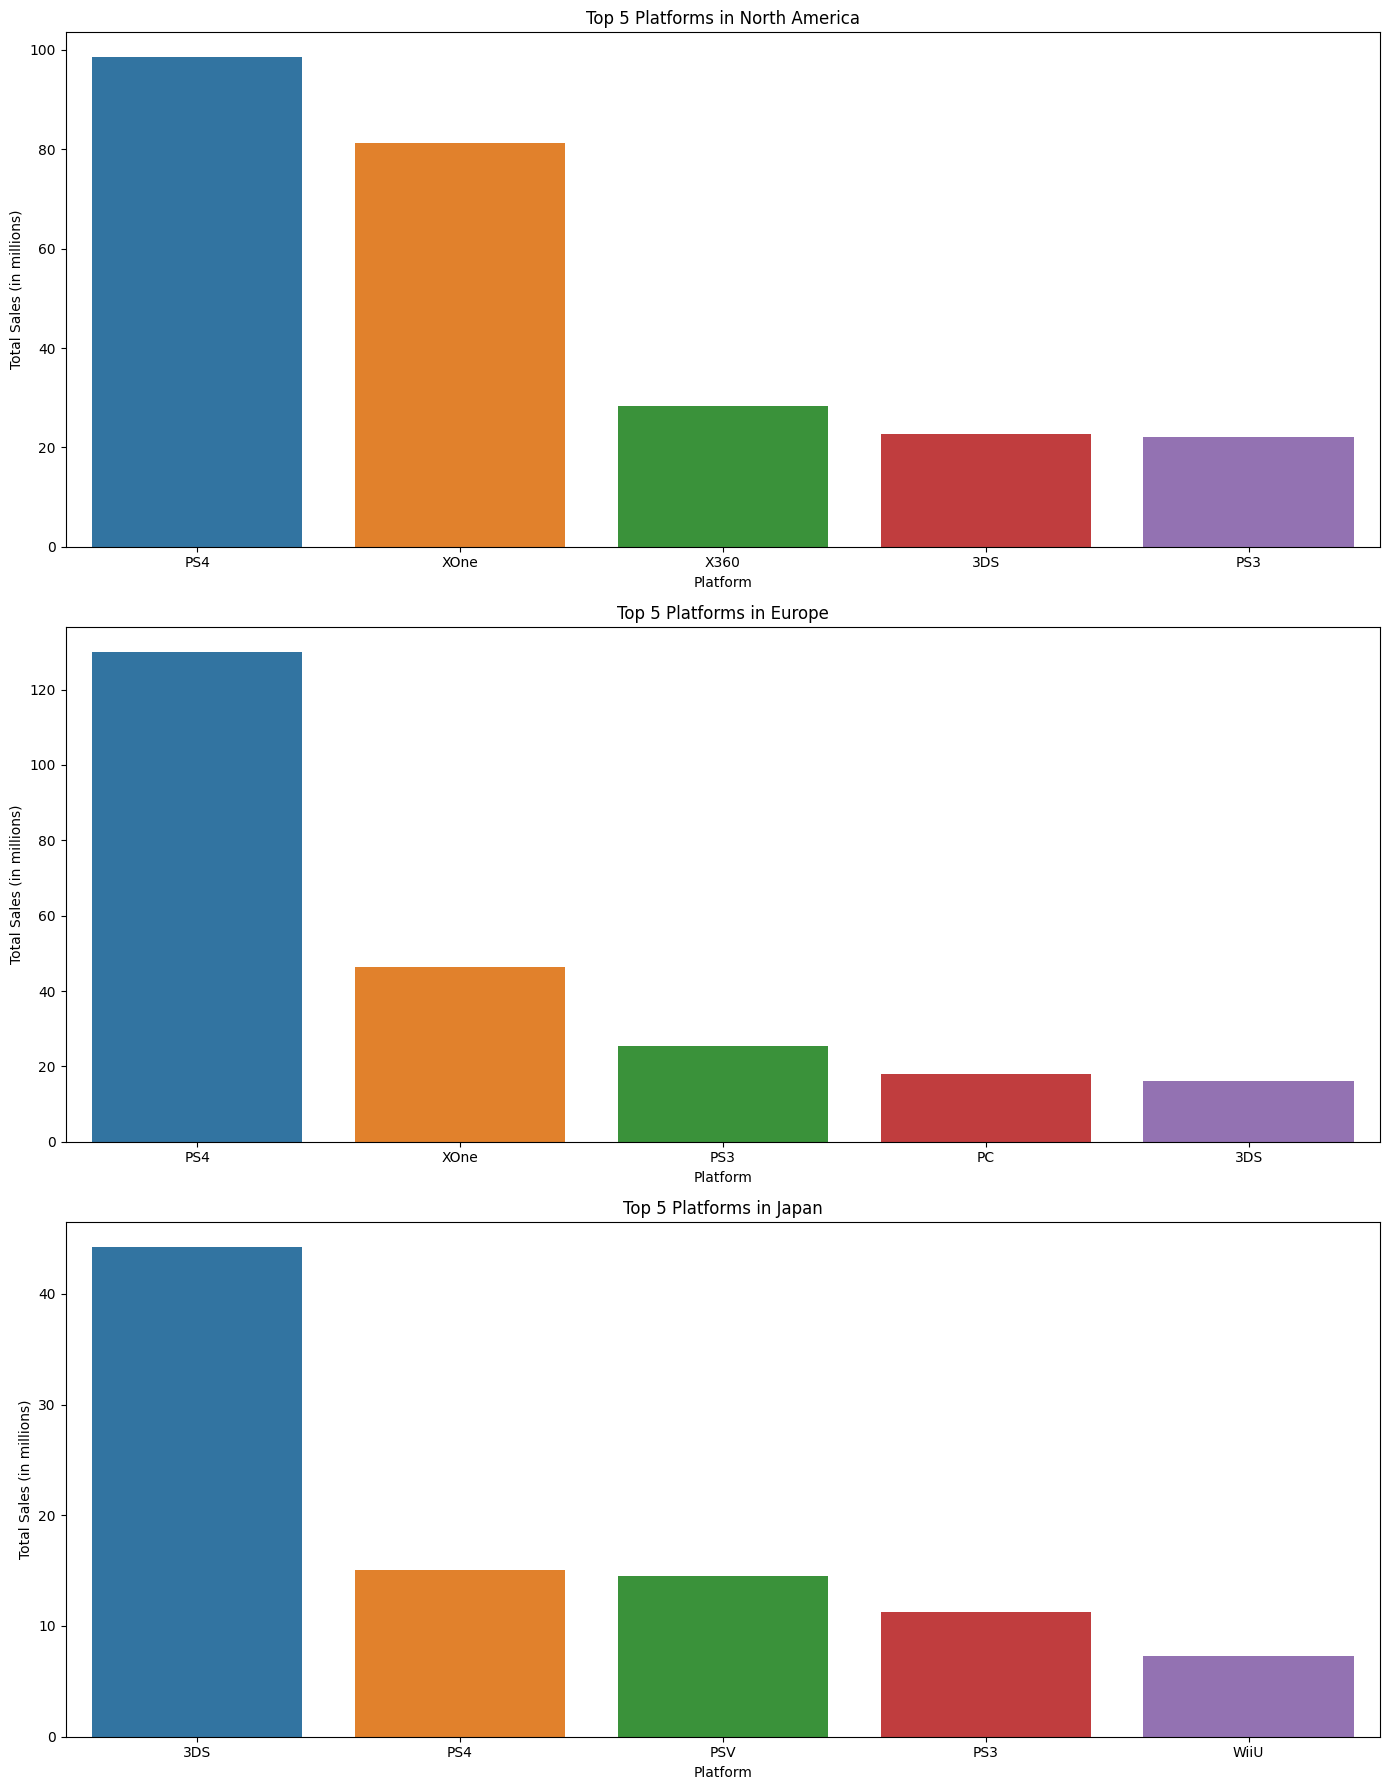

In [27]:
# Visualizing the top 5 platforms in North America, Europe, and Japan
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

sns.barplot(x=top_5_plat_na.index, y=top_5_plat_na.values, ax=axs[0])
axs[0].set_title('Top 5 Platforms in North America')
axs[0].set_xlabel('Platform')
axs[0].set_ylabel('Total Sales (in millions)')

sns.barplot(x=top_5_plat_eu.index, y=top_5_plat_eu.values, ax=axs[1])
axs[1].set_title('Top 5 Platforms in Europe')
axs[1].set_xlabel('Platform')
axs[1].set_ylabel('Total Sales (in millions)')

sns.barplot(x=top_5_plat_jp.index, y=top_5_plat_jp.values, ax=axs[2])
axs[2].set_title('Top 5 Platforms in Japan')
axs[2].set_xlabel('Platform')
axs[2].set_ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

In North America, the top platforms are the PS4 and XOne.
In Europe, the top two platforms are the PS4 and the XOne but more so the PS4.
In Japan, the top platform is the 3DS followed by the PS4 and PSV.

North America has the highest sales across its top 5 platforms with PS4 and XOne near 180 million in sales while Japan has the least with its top platform the 3DS has around 44 million in sales. North America and Europe are the most similar since they both have PS4 and XOne in their top 2 platforms. Japan prefers the Japanese companies Sony and Nintendo, since Sony owns the PS4, PS3, and PSV while Nintendo owns the other 2.

In [28]:
# Determining the top 5 genres in North America, Europe and Japan
top_5_genre_na = new_data.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).head(5)
top_5_genre_eu = new_data.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False).head(5)
top_5_genre_jp = new_data.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False).head(5)
print(top_5_genre_na)
print(top_5_genre_eu)
print(top_5_genre_jp)

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64
genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64
genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64


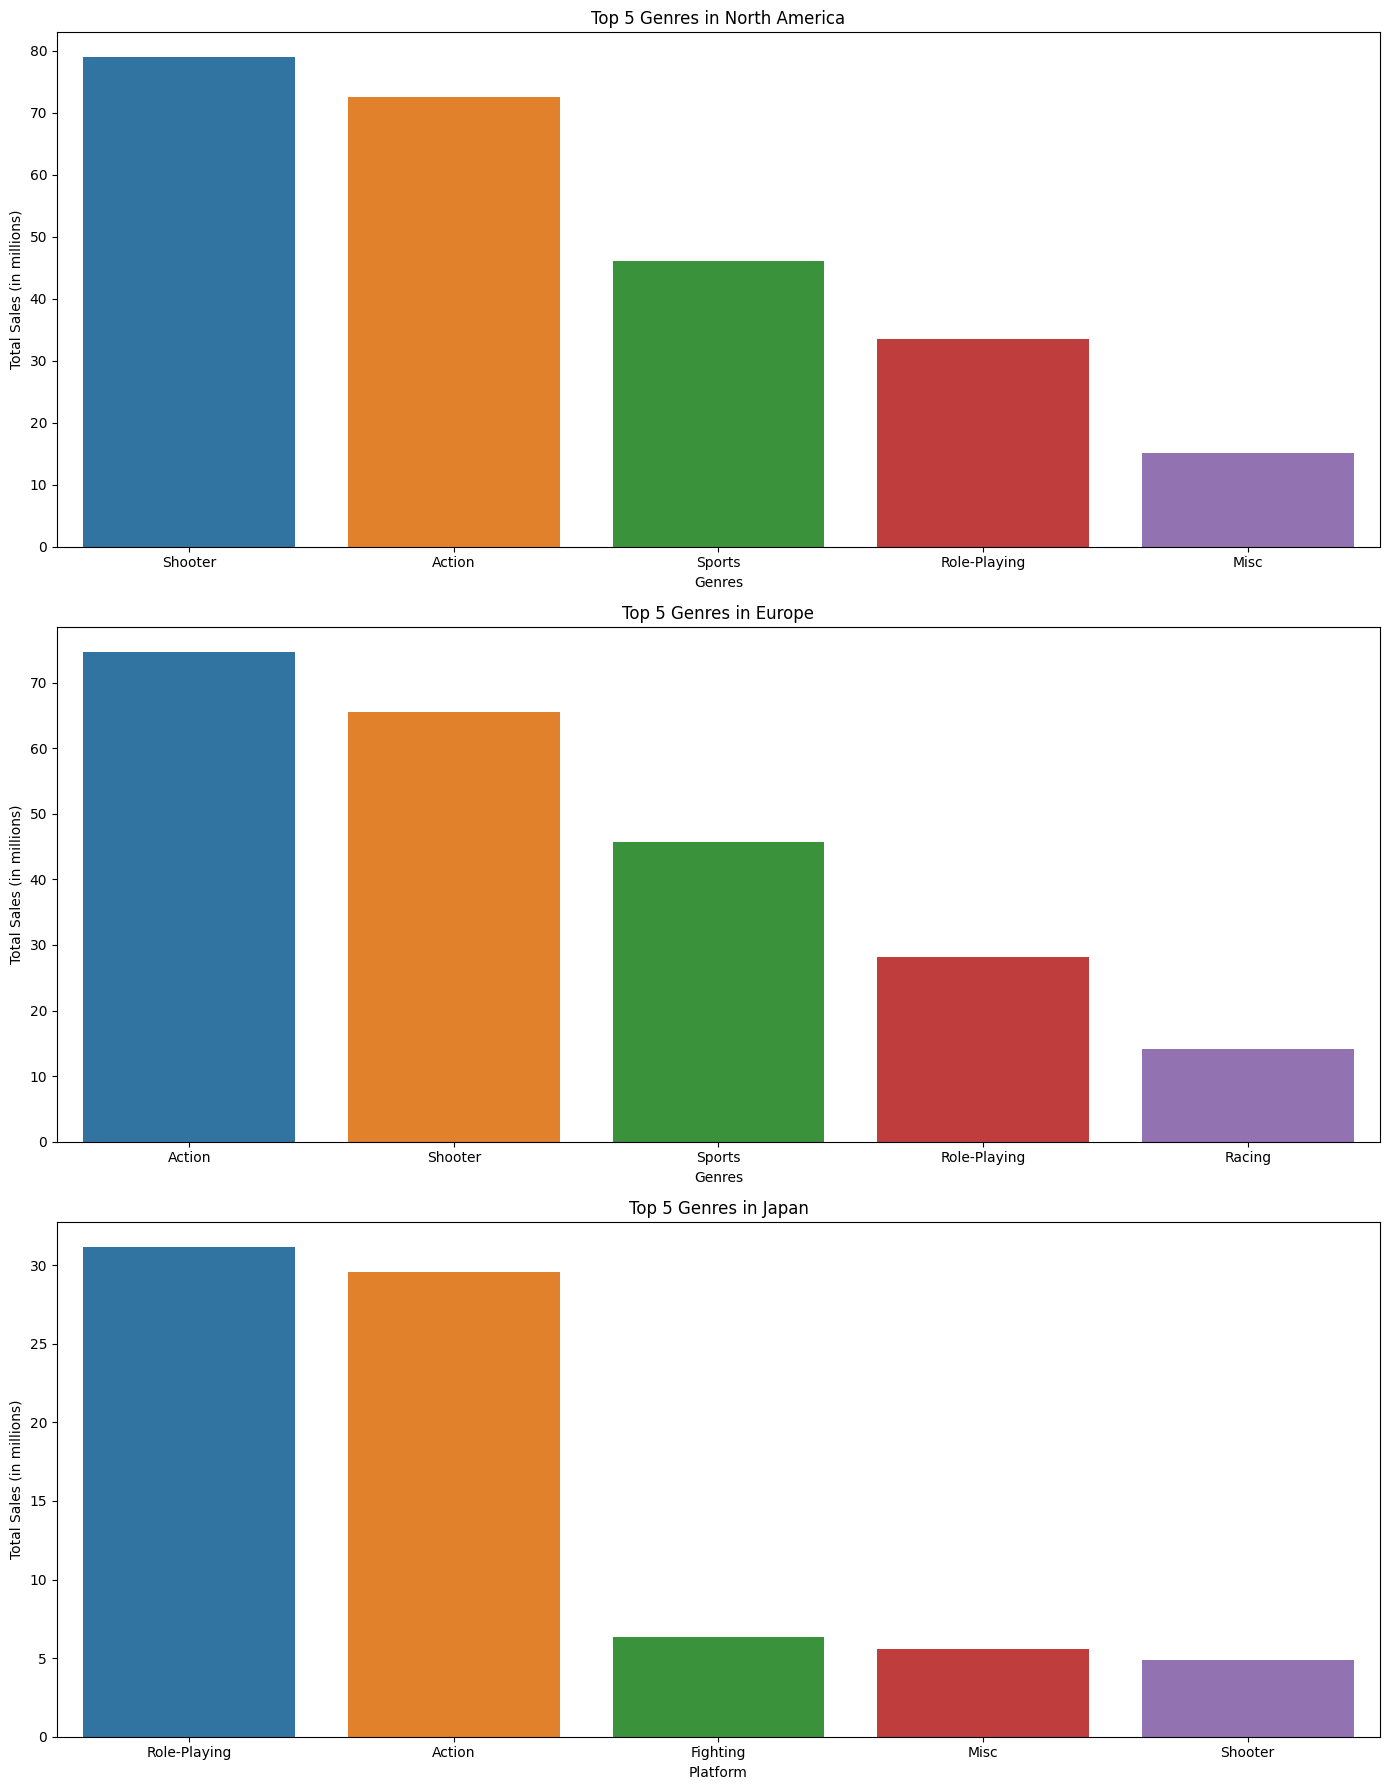

In [29]:
# Visualization of the top 5 genres in North America, Europe, and Japan
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

sns.barplot(x=top_5_genre_na.index, y=top_5_genre_na.values, ax=axs[0])
axs[0].set_title('Top 5 Genres in North America')
axs[0].set_xlabel('Genres')
axs[0].set_ylabel('Total Sales (in millions)')

sns.barplot(x=top_5_genre_eu.index, y=top_5_genre_eu.values, ax=axs[1])
axs[1].set_title('Top 5 Genres in Europe')
axs[1].set_xlabel('Genres')
axs[1].set_ylabel('Total Sales (in millions)')

sns.barplot(x=top_5_genre_jp.index, y=top_5_genre_jp.values, ax=axs[2])
axs[2].set_title('Top 5 Genres in Japan')
axs[2].set_xlabel('Platform')
axs[2].set_ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

In North America and Europe, the top 3 genres are Action, Sports, and Shooter, making North America more similar to Europe than Japan. In Japan, the top genre is Role-playing, follwed by Action then Fighting. The Action genre is popular among all three regions since Action is in the top 3 out of 5.

In [30]:
# Determining the top ESRB ratings in North America, Europe, and Japan
rating_na = new_data.groupby(['rating'])['na_sales'].sum().sort_values(ascending=False)
rating_eu = new_data.groupby(['rating'])['eu_sales'].sum().sort_values(ascending=False)
rating_jp = new_data.groupby(['rating'])['jp_sales'].sum().sort_values(ascending=False)
print(rating_na)
print(rating_eu)
print(rating_jp)

rating
M          96.42
Unknown    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64
rating
M          93.44
Unknown    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64
rating
Unknown    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64


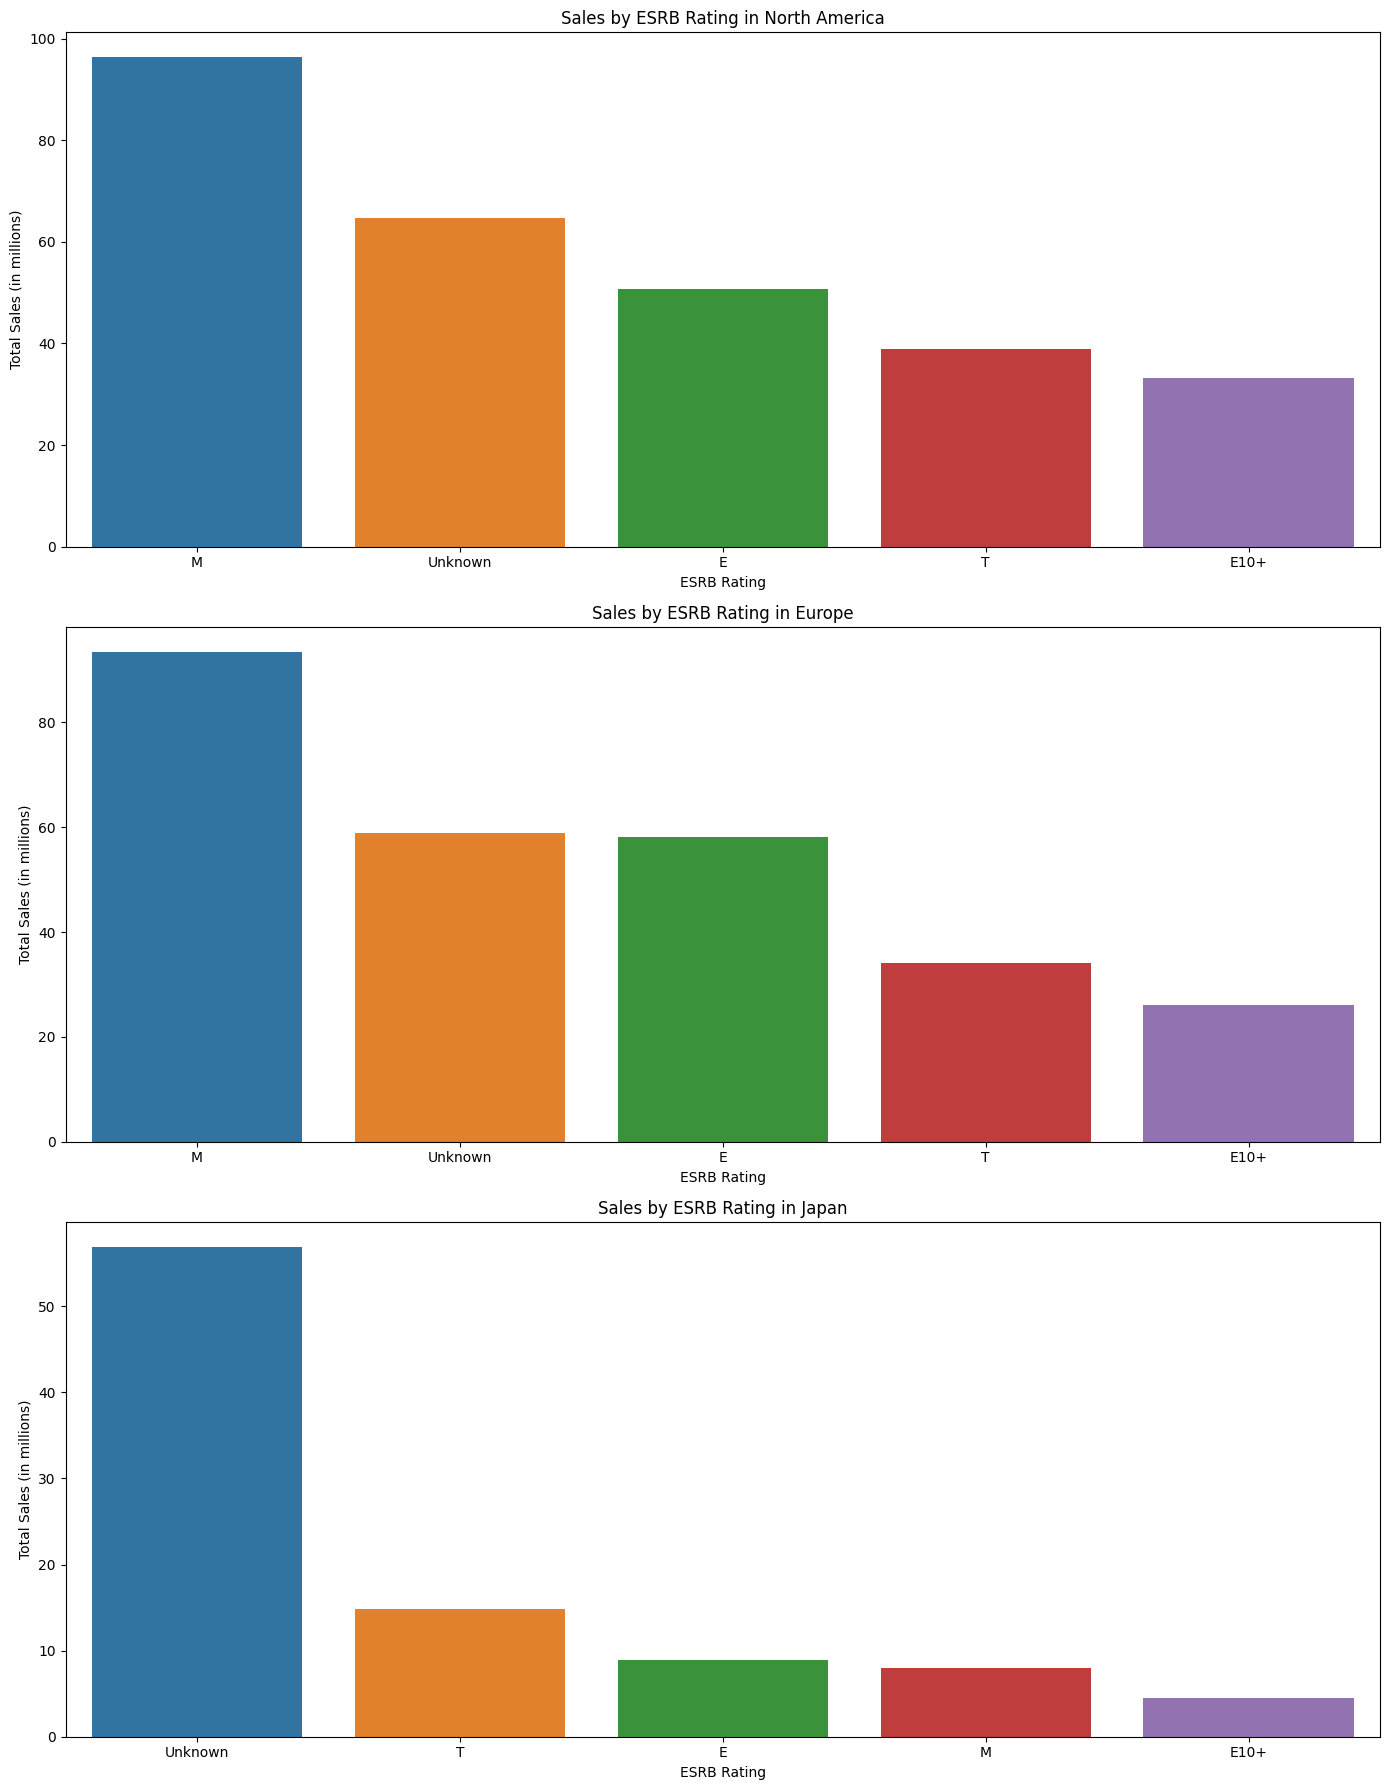

In [31]:
# Visualization of the top ESRB ratings in North America, Europe, and Japan
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

sns.barplot(x=rating_na.index, y=rating_na.values, ax=axs[0])
axs[0].set_title('Sales by ESRB Rating in North America')
axs[0].set_xlabel('ESRB Rating')
axs[0].set_ylabel('Total Sales (in millions)')

sns.barplot(x=rating_eu.index, y=rating_eu.values, ax=axs[1])
axs[1].set_title('Sales by ESRB Rating in Europe')
axs[1].set_xlabel('ESRB Rating')
axs[1].set_ylabel('Total Sales (in millions)')

sns.barplot(x=rating_jp.index, y=rating_jp.values, ax=axs[2])
axs[2].set_title('Sales by ESRB Rating in Japan')
axs[2].set_xlabel('ESRB Rating')
axs[2].set_ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

North America and Europe have very similar graphs and and sales by ESRB rating. The top 5 ratings are identical and the only difference is the number of sales, since North America has slightly higher sales for 4 out of 5 of the ratings. Japan is the most different with the highest sales are for the "Unkown" rating followed by T. The Unkown ratings for games released in Japan could be due to they have a different rating system for the games released there.

### Test Hypotheses

Test the following hypothesis: Average user ratings of the Xbox One and PC platforms are the same.

Here, we can use an independent t-test to test this hypothesis because a t-test is designed to test the for differences between the means of two groups and the two samples are independent from each other.

Null Hypothesis: The average user ratings of the Xbox One and PC platforms are the same.
Alternative Hypothesis: The average user ratings of the Xbox One and PC platforms are different.

I chose this null hypothesis because it means there is no difference in the samples and it could be rejected when tested against.The alternative hypothesis indicates an a difference if the the null hypothesis is rejected.

In [32]:
# Filtering XOne user_score and PC user_score
xOne_ratings = new_data[new_data['platform'] == 'XOne']['user_score']
pc_ratings = new_data[new_data['platform'] == 'PC']['user_score']

# Running t-test
t_stat, p_value = ttest_ind(xOne_ratings, pc_ratings, nan_policy='omit')

# Set conventional alpha value since a stricter or looser value is not neccessary
alpha = 0.05

if(p_value < alpha):
    print('We reject the null hypothesis: there is significant between average user ratings of Xbox One and PC.')
else:
    print('We fail to reject the null hypothesis: there is not a significant between average user ratings of Xbox One and PC.')
    
xOne_ratings_mean = xOne_ratings.mean()
pc_ratings_mean = pc_ratings.mean()
# Print results
print(f't_stat: {t_stat}, p_value: {p_value}, alpha: {alpha}, xOne ratings mean: {xOne_ratings_mean}, pc ratings mean: {pc_ratings_mean}') 

We fail to reject the null hypothesis: there is not a significant between average user ratings of Xbox One and PC.
t_stat: 1.6285882029651264, p_value: 0.10450507919348513, alpha: 0.05, xOne ratings mean: 6.594545454545454, pc ratings mean: 6.298360655737704


When testing the null hypothesis: The average user ratings of the Xbox One and PC platforms are nearly the same. The result returns a t_stat value of around 1.6 and a p_value of about 0.10. A smaller t_stat value (between -2 and 2 conventionally) and a big p-value greater than alpha means the null hypothesis is not discredited and therefore we fail to reject and the t-test found there is a not significant difference in the mean user ratings of Xbox One and PC. The mean user ratings for Xbox One is around 6.59 and PC is around 6.2. This suggests that users rate games on the Xbox One platform more favorably compared to games on the PC platform.

Test the hypothesis: Average user ratings for the Action and Sports genres are different.

Here, we can use an independent t-test to test this hypothesis because a t-test is designed to test the for differences between the means of two groups and the two samples are independent from each other.

Null Hypothesis: The average user ratings for Action and Sports genres are the same. Alternative Hypothesis: The average user ratings for Action and Sports genres are different.

I chose this null hypothesis because it means there is no difference in the samples and it could be rejected when tested against.The alternative hypothesis indicates an a difference if the the null hypothesis is rejected.

In [33]:
#Filtering Action user_score and Sports user_score
action_ratings = new_data[new_data['genre'] == 'Action']['user_score']
sports_ratings = new_data[new_data['genre'] == 'Sports']['user_score']

# Running t-test
t_stat, p_value = ttest_ind(action_ratings, sports_ratings, nan_policy='omit')

# Set conventional alpha value since a stricter or looser value is not neccessary
alpha = 0.05

if(p_value < alpha):
    print('We reject the null hypothesis: there is significant between average user ratings of Action and Sports genres.')
else:
    print('We fail to reject the null hypothesis: there is not a significant between average user ratings of Action and Sports genres.')
    
action_ratings_mean = action_ratings.mean()
sports_ratings_mean = sports_ratings.mean()
# Print results
print(f't_stat: {t_stat}, p_value: {p_value}, alpha: {alpha}, action ratings mean: {action_ratings_mean}, sports ratings mean: {sports_ratings_mean}')

We reject the null hypothesis: there is significant between average user ratings of Action and Sports genres.
t_stat: 9.42517304894804, p_value: 2.8711147985107304e-19, alpha: 0.05, action ratings mean: 6.760606060606061, sports ratings mean: 5.225196850393701


When testing the null hypothesis: The average user ratings for Action and Sports genres are not the same. The result returns a t_stat value of around 9.4 and a p_value of about 2e-19, which is incredibly small. A bigger t_stat value and a small p-value means the null hypothesis is discredited and therefore rejected and the t-test found there is a significant difference in the mean user ratings or Action and Sports genres. The mean user rating for the Action genre is around 6.7 and Sports is around 5.2. This suggests users rate Action games more favorably than Sports games.

### Conclusion

After analyzing the data, I have determined that the most likely games to succeed in an ad campaign for 2017 are Action or Shooter or Sports games releasing on PS4 and Xbox One and are rated "M" by ESRB. In recent years up to 2016, these two platforms generated the most revenue. PS4 and Xbox One are growing and may be near the peak of popularity. Since PS4 and Xbox One are the newset platforms they will bring in the most revenue so targeting older platforms will not maximize revenue. This is further supported by the analysis of the PS4 platform and how games that released on PS4 along with other consoles showed that the PS4 version is generally more profitable. As for the Action genre, earlier analysis showed that this genre have most number of games and the most global sales, making these types of games more likely to bring in the most revenue. As for the "M" rating, the "M" rating is by far the most profitable rating on a global scale. When it comes to user rating, I determined that these scores are not a good parameter to determine which games or genres are more popular or bring in more revenue since there was no strong correlation among scores and sales.